In [281]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [282]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import IPython.display as display
import os

from classes import *
from gen_utils import *
from tqdm import tqdm
from utils import *

# fix the seed for reproducibility
random.seed(666)
np.random.seed(666)


# minihack env creation with a .des file

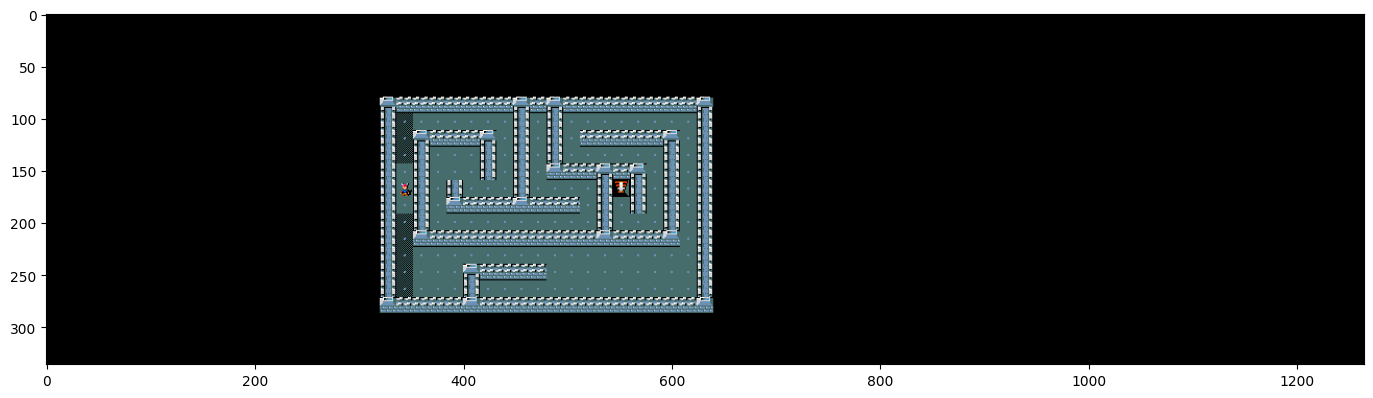

In [283]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "maps/maze.des",
    max_episode_steps=10000
)
state = env.reset()
#env.render()
plt.imshow(state['pixel'])

In [284]:
state = env.reset()
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

map = Map(game_map, start, target)

In [285]:
print(f"> start: {map.start}, target: {map.target}")

> start: (10, 21), target: (10, 34)


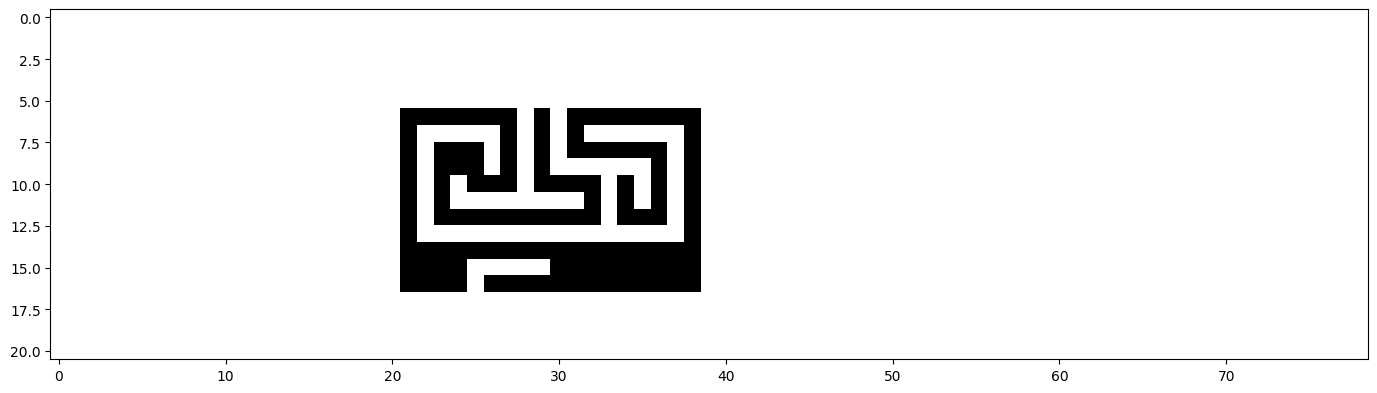

In [286]:
# print the map_matrix with matplotlib where the walls are black and the floor is white
plt.imshow(map.map_matrix, cmap='gray')
plt.show()


In [287]:
# show the size of the map
print(f"> map size: {map.game_map.shape}")

> map size: (21, 79)


In [288]:
from pyswip import Prolog


In [289]:
PATH = 'kb/kb.pl'
KB = Prolog()
KB.consult(PATH)

In [290]:
KB.retractall("maze(_)")
KB.retractall("start(_,_)")
KB.asserta(f'maze({map.map_matrix})')
KB.asserta(f'start({map.start[0]}, {map.start[1]})')

In [291]:
for i in KB.query("maze(X)"):
    print(f'{i["X"]}\n')

#list(KB.query("maze(X)"))


[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# NTH1

In Prolog, `nth1/3` is a built-in predicate that is used to access elements in a list by index. The `nth1/3` predicate has the following form:

```prolog
nth1(Index, List, Element)
```
Index: The index of the element you want to access.

List: The list from which you want to access the element.

Element: The variable that will be unified with the element at the specified index.


In [292]:
result = list(KB.query("maze(M), nth1(14, M, Row), nth1(23, Row, Cell)"))
if result:
    cell_value = result[0]["Cell"]
    print(f"Cell value: {cell_value}")
else:
    print("Query result is empty.")

Cell value: 1


In [293]:
list(KB.query("start(ROW,COL)"))

[{'ROW': 10, 'COL': 21}]

In [294]:
list(KB.query(f"is_valid(10,23)"))

[]

In [295]:
list(KB.query(f"is_valid(9,23)"))

[]

In [296]:
solution = list(KB.query(f"is_valid(14,23)"))
if solution:
    print("Position is valid.")
else:
    print("Position is not valid.")

Position is not valid.


In [297]:
list(KB.query(f"is_valid_action(11,23,0)"))

[]

In [298]:
list(KB.query(f"is_valid_action(10,23,0)"))

[]

In [299]:
#individual = Individual(random_nactions(), 1, map)

In [300]:
#individual.path[0] == map.start

# We have to decide if we want to generate a random path or random actions

random path $\Rightarrow$ a path of exactly n steps

random actions $\Rightarrow$ many action will be not valid $\Rightarrow$ the path will be shorter OR, as is implemented now, with many repetition of the same position.

# NOTE:
minihack wont crash if we input a not valid action starting from a valid action. It will simply not execute the action (as if we are playing), hence we are updating the path position with the same position.

In [301]:
map.start

(10, 21)

In [302]:
Individual(random_nactions(300), 1, map)

Path: [(10, 21), (10, 21), (10, 21), (11, 21), (11, 21), (12, 21), (13, 21), (12, 21), (12, 21), (12, 21), (13, 21), (13, 21), (13, 21), (12, 21), (12, 21), (11, 21), (12, 21), (11, 21), (11, 21), (12, 21), (12, 21), (13, 21), (14, 21), (13, 21), (13, 21), (13, 21), (14, 21), (13, 21), (13, 21), (14, 21), (13, 21), (14, 21), (14, 21), (13, 21), (12, 21), (12, 21), (12, 21), (12, 21), (11, 21), (10, 21), (10, 21), (11, 21), (11, 21), (11, 21), (11, 21), (11, 21), (11, 21), (12, 21), (12, 21), (12, 21), (12, 21), (11, 21), (11, 21), (12, 21), (12, 21), (12, 21), (12, 21), (12, 21), (12, 21), (13, 21), (13, 21), (13, 21), (13, 21), (13, 21), (14, 21), (14, 22), (14, 22), (15, 22), (16, 22), (16, 22), (16, 21), (16, 22), (16, 23), (15, 23), (15, 24), (16, 24), (16, 23), (16, 23), (16, 23), (16, 22), (16, 21), (16, 21), (16, 21), (16, 22), (16, 21), (15, 21), (15, 22), (15, 23), (15, 24), (15, 24), (15, 24), (14, 24), (14, 25), (14, 26), (14, 27), (14, 28), (14, 29), (14, 30), (14, 30), (14

In [303]:
individual = Individual(random_nactions(300), 1, map)
individual1 = Individual(random_nactions(300), 1, map)
len(crossover_uniform(individual.actions, individual1.actions))

300

In [304]:
# no need to call raw count_loops function anymore
individual.path.loops, individual1.path.loops

(264, 265)

In [305]:
(individual.path)

In [306]:
format = 'best_individual in generation {}: fitness: {}, \
wrong actions: {}, \
loops: {}, \
dead_ends: {}, \
distance: {}'

In [307]:
individual.target_index

-1

In [308]:
# create first generation
MAX_GENERATIONS = 30
MAX_INDIVIDUALS = 10
best_individuals = []

print("> Creating initial population...")
individuals = [Individual(random_nactions(300), 1, map) for _ in range(MAX_INDIVIDUALS)]
individuals.sort(key=lambda x: x.fitness, reverse=True)
#print(f'best_individual: {individuals[0].fitness}')
print("> Evolving...")

for generation in tqdm(range(MAX_GENERATIONS)):

    best_fitness = individuals[0].fitness
    best_individuals.append(individuals[0]) 
    if generation % 25 == 0:
        print( 
            format.format(
                generation, 
                best_fitness, 
                individuals[0].wrong_actions, 
                individuals[0].path.loops, 
                individuals[0].path.dead_ends, 
                individuals[0].distance
            ) 
        )

    # take 2 best individuals -> maybe can be replaced with probability distribution based on fitness
    # also roulette wheel selection.
    child1, child2 = individuals[0].actions, individuals[1].actions
    offspring = [crossover_uniform(child1, child2) for _ in range(MAX_INDIVIDUALS)]
    offspring = [mutate(child, valid_actions_bitmap(map.start, path_from_actions(map.game_map, map.start, child))) for child in offspring]

    individuals[2:] = [Individual(offspring[i], generation+1, map) for i in range(MAX_INDIVIDUALS-2)]
    individuals.sort(key=lambda x: x.fitness, reverse=True)

best_fitness = individuals[0].fitness
best_individuals.append(individuals[0])
print(f'best_individual in generation {generation}: {best_fitness}, wrong actions: {individuals[0].wrong_actions}')



> Creating initial population...
> Evolving...


  3%|▎         | 1/30 [00:00<00:04,  5.93it/s]

best_individual in generation 0: fitness: -674, wrong actions: 96, loops: 242, dead_ends: 0, distance: 7


  7%|▋         | 2/30 [00:00<00:04,  5.74it/s]

 87%|████████▋ | 26/30 [00:03<00:00,  7.70it/s]

best_individual in generation 25: fitness: -602, wrong actions: 26, loops: 250, dead_ends: 0, distance: 5


100%|██████████| 30/30 [00:03<00:00,  7.54it/s]

best_individual in generation 29: -600, wrong actions: 29


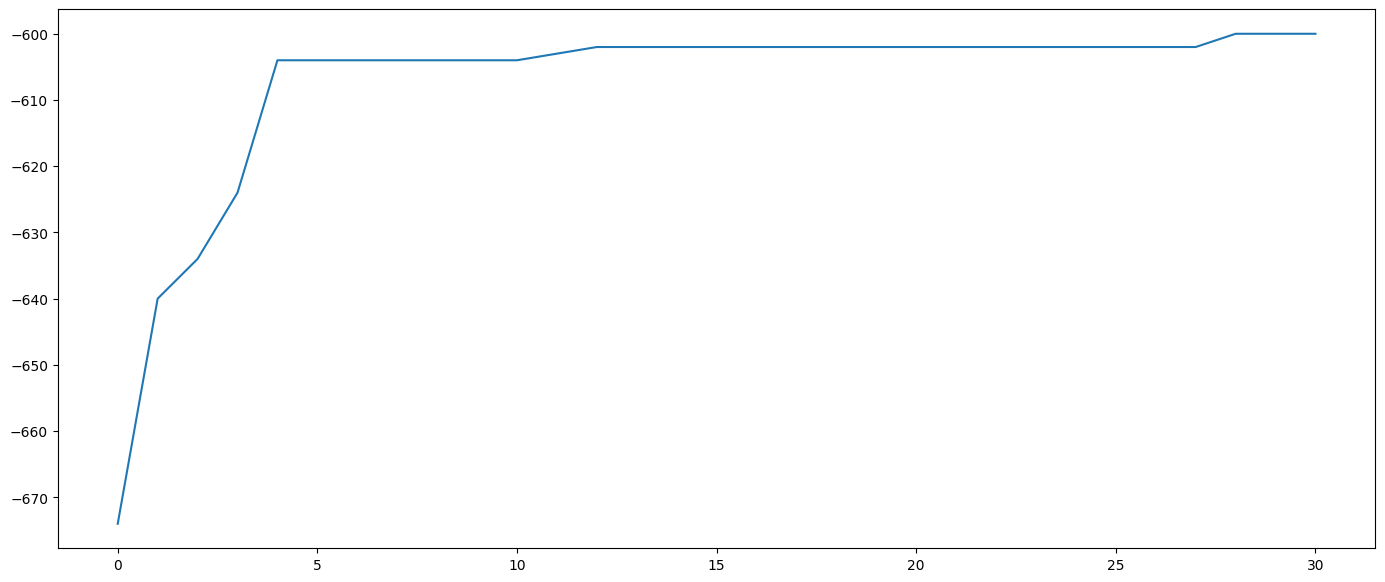

In [309]:
# Plot for each generation the best fitness
best_fitness = [best_individuals[i].fitness for i in range(len(best_individuals))]
plt.plot(best_fitness)

In [310]:
individuals[3].generation

30

In [311]:
format_title = 'Generation {}, fitness: {}, position: {}, action: {}, wrong actions: {}, loops: {}, dead ends: {}, step: {}/{}'

KeyboardInterrupt: 

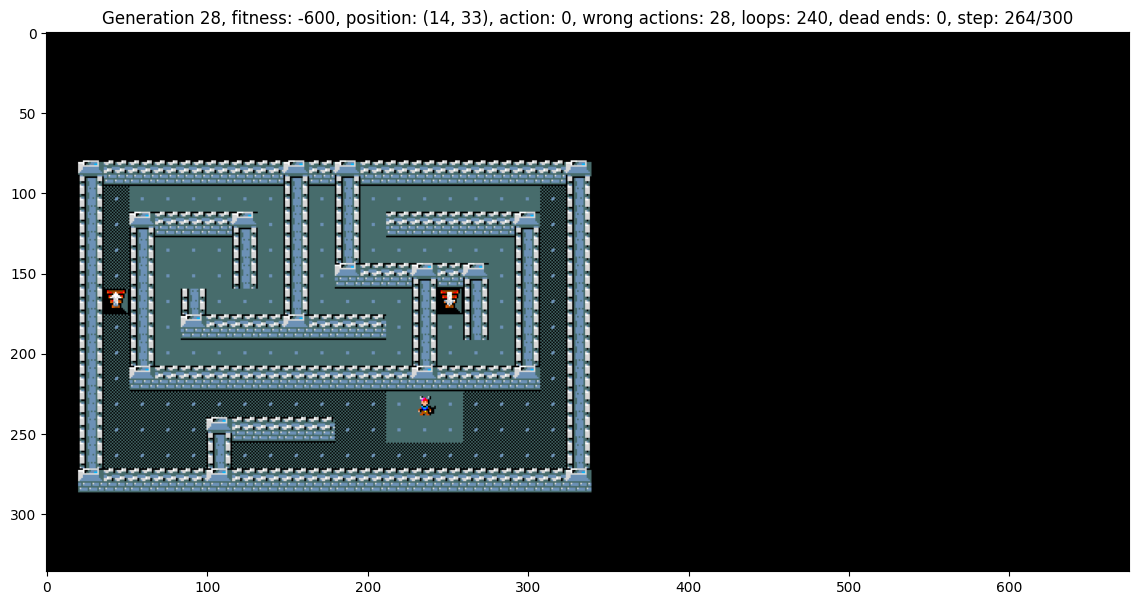

In [312]:
env.reset()
plt.rcParams['figure.figsize'] = [17, 7]

image = plt.imshow(game[:, 300:975])
# for generation, path in enumerate(best_paths):
# plt.title(f"Generation {generation}, fitness: {best_scores[generation]:.2f}, last move: {path[-1]}")
#start = best_paths[0]
#path = best_paths[-1]
actions = []
actions = individuals[0].actions
wrong = 0

for i, action in enumerate(actions):
    try: 
        s, _, _, _ = env.step(action)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        plt.title(
            format_title.format(
                individuals[0].generation, 
                individuals[0].fitness, 
                individuals[0].path[i], 
                action, 
                wrong, 
                individuals[0].path.loops, 
                individuals[0].path.dead_ends, 
                i+1, len(actions)
            )
        )
        image.set_data(s['pixel'][:, 300:975])
        #time.sleep(0.1)
        if individuals[0].path[i] == map.target:
            print('YOU WON! <3')
            break
        if individuals[0].path[i] == individuals[0].path[i-1]:
            wrong += 1
    except RuntimeError:
        print('YOU WON! <3')

In [ ]:
target

(10, 34)

In [ ]:
"""MAX_GENERATIONS = 1000
MAX_INDIVIDUALS = 100

best_scores =[]
best_paths = []
zero_fitness = []

# create a list of individuals, starting with random moves (illegal actions filtered out)
print("> Creating initial population...")
individuals = [random_nsteps(game_map, start, target) for _ in range(MAX_INDIVIDUALS)]
best_fitness = np.inf

print("> Evolving...")
for generation in tqdm(range(MAX_GENERATIONS)):
    
    generation_scores = []

    #fitnesses = [fitness_function(individual, checkpoints, generation) for individual in individuals]
    #fitness_function = lambda path: abs(path[-1][0] - target[0]) + abs(path[-1][1] - target[1])

    ind_actions = [actions_from_path(start, ind) for ind in individuals]
    generation_scores.append(min(fitnesses))

    # this is a list of tuples (individual, fitness). individual is a list of moves
    population = list(zip(individuals, fitnesses))
    actions =  list(zip(ind_actions, fitnesses))

    # sorting the population by best fitness (lower is better)
    population.sort(key=lambda x: x[1])
    actions.sort(key=lambda x:x[1])
    # sort ind_actions with respect to population
    
    #print(f"best score: {population[0][1]:.2f}")

    # take 2 best individuals -> maybe can be replaced with probability distribution based on fitness
    # also roulette wheel selection.

    child1, child2, = actions[0][0], actions[1][0]

    offspring = [crossover(child1, child2) for _ in range(MAX_INDIVIDUALS)]
    offspring = [mutate(child) for child in offspring]
    ind_actions = offspring
    individuals = [path_from_actions(game_map, start, child) for child in offspring]

    best_fitness = population[0][1]
    best_scores.append(population[0][1])    
    best_paths.append(population[0][0])
    #print(f"Generation {generation}: best score {best_fitness:.2f}")

    if best_fitness == 0:
        zero_fitness.append(population[0][0])
    
# print best score and best path
best_idx = np.argmin(best_scores)
print(f"Best score: {best_scores[best_idx]:.2f}")
print(f"Best path: {best_paths[best_idx]}")
print(f"generation of best path: {best_idx}")"""

'MAX_GENERATIONS = 1000\nMAX_INDIVIDUALS = 100\n\nbest_scores =[]\nbest_paths = []\nzero_fitness = []\n\n# create a list of individuals, starting with random moves (illegal actions filtered out)\nprint("> Creating initial population...")\nindividuals = [random_nsteps(game_map, start, target) for _ in range(MAX_INDIVIDUALS)]\nbest_fitness = np.inf\n\nprint("> Evolving...")\nfor generation in tqdm(range(MAX_GENERATIONS)):\n    \n    generation_scores = []\n\n    #fitnesses = [fitness_function(individual, checkpoints, generation) for individual in individuals]\n    #fitness_function = lambda path: abs(path[-1][0] - target[0]) + abs(path[-1][1] - target[1])\n\n    ind_actions = [actions_from_path(start, ind) for ind in individuals]\n    generation_scores.append(min(fitnesses))\n\n    # this is a list of tuples (individual, fitness). individual is a list of moves\n    population = list(zip(individuals, fitnesses))\n    actions =  list(zip(ind_actions, fitnesses))\n\n    # sorting the popula

In [ ]:
# Vediamo che succede se due azioni sono uguali
actions_test = random_nactions(300)

In [ ]:
path_test = path_from_actions(map.game_map, map.start, actions_test)
path2 = Path(path_test, map)
path2.path

[(10, 27),
 (10, 27),
 (10, 27),
 (10, 26),
 (10, 26),
 (10, 26),
 (10, 25),
 (10, 25),
 (10, 25),
 (10, 26),
 (10, 26),
 (10, 26),
 (10, 25),
 (9, 25),
 (9, 25),
 (10, 25),
 (9, 25),
 (10, 25),
 (9, 25),
 (9, 25),
 (10, 25),
 (10, 26),
 (10, 25),
 (10, 25),
 (10, 25),
 (9, 25),
 (9, 25),
 (8, 25),
 (8, 24),
 (8, 24),
 (8, 24),
 (8, 24),
 (8, 23),
 (8, 23),
 (9, 23),
 (9, 23),
 (9, 23),
 (8, 23),
 (8, 23),
 (8, 23),
 (9, 23),
 (9, 23),
 (9, 23),
 (9, 23),
 (9, 23),
 (9, 23),
 (9, 23),
 (10, 23),
 (10, 23),
 (11, 23),
 (11, 23),
 (11, 23),
 (11, 23),
 (11, 23),
 (12, 23),
 (12, 23),
 (12, 24),
 (12, 24),
 (12, 24),
 (12, 24),
 (12, 24),
 (12, 23),
 (11, 23),
 (12, 23),
 (12, 23),
 (12, 24),
 (12, 24),
 (12, 23),
 (11, 23),
 (11, 23),
 (11, 23),
 (12, 23),
 (12, 23),
 (12, 24),
 (12, 25),
 (12, 25),
 (12, 24),
 (12, 24),
 (12, 24),
 (12, 23),
 (11, 23),
 (11, 23),
 (12, 23),
 (12, 23),
 (12, 23),
 (12, 23),
 (11, 23),
 (12, 23),
 (11, 23),
 (11, 23),
 (10, 23),
 (11, 23),
 (11, 23),
 (12

In [ ]:
actions_test2 = actions_from_path(map.start, path2.path)

In [ ]:
print(actions_test2)

[1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 0, 1, 2, 0, 2, 0, 1, 2, 1, 3, 1, 1, 0, 1, 0, 3, 1, 1, 1, 3, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 0, 2, 1, 1, 1, 3, 0, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 3, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 0, 2, 1, 2, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 0, 0, 1, 3, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 3, 1, 3, 1, 1, 2, 2, 3, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0]


In [ ]:
count = 0
for i in range(len(actions_test)):
    if actions_test[i] != actions_test2[i]:
        count += 1
print(count)

114
